**Task 1 - Flight Delay Prediction Model**

Flight delay prediction model is a trained machine learning model which predict that the flight you what to know will be delayed or not based on past data of flights . In this script we wil first process our data in accordance to our model and to get insights on how flights were delayed and various other factors and then train various machine learning classification model such as logistic regression, tree classifier, random forest classifier to gain best results.

Dataset used is [Airlines_delay](https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay)



Some important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing dataset
flight_data = pd.read_csv('./airlines_delay.csv')
flight_data.shape

(539382, 8)

Exploratory Data Analysis-(EDA)

In [ ]:
flight_data.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [ ]:
#checking for any null values in our data
flight_data.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [ ]:
# Gaining various information for our data

In [ ]:
flight_data.columns

Index(['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo',
       'DayOfWeek', 'Class'],
      dtype='object')

In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [ ]:
flight_data.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


Visulization of our data to get insights

<Axes: xlabel='Airline', ylabel='count'>

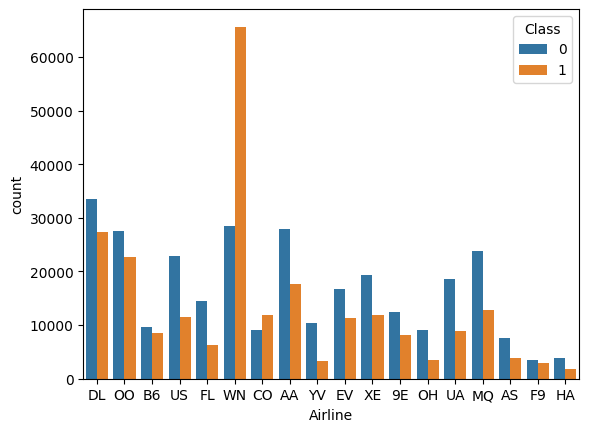

In [ ]:
sns.countplot(x = 'Airline', hue = 'Class', data = flight_data)

<Axes: xlabel='Airline', ylabel='Length'>

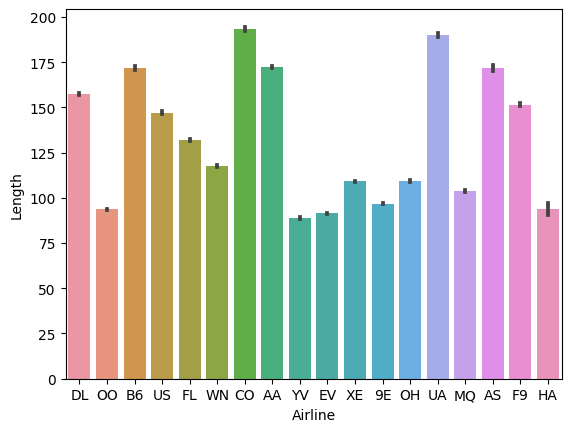

In [ ]:
sns.barplot(x = 'Airline',y='Length', data = flight_data)

<Axes: xlabel='Airline', ylabel='Time'>

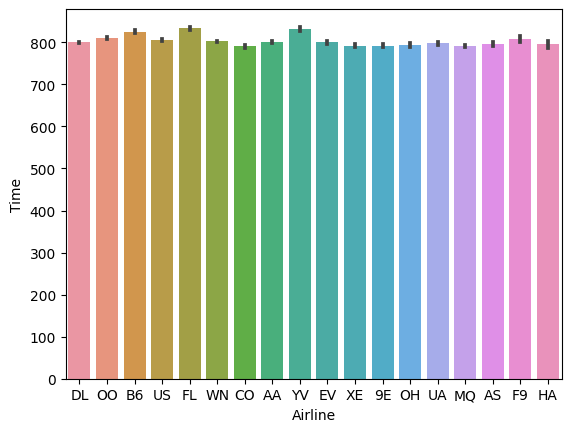

In [ ]:
sns.barplot(x = 'Airline', y = 'Time', data = flight_data)

*From above illuistration we get insights on data such as:
WN is highest delay than other airliness,
CO and UA have longest average flight time,
Almost all of the flight have same departure*

Preprocessing of our given data

In [ ]:
#removing un required data in our model
flight_data = flight_data.drop('Flight', axis =1)
flight_data.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,DL,ATL,HOU,1,0
1,360.0,146.0,OO,COS,ORD,4,0
2,1170.0,143.0,B6,BOS,CLT,3,0
3,1410.0,344.0,US,OGG,PHX,6,0
4,692.0,98.0,FL,BMI,ATL,4,0


In [ ]:
print(flight_data.dtypes)

Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object


Encoding of various data to make all data in int form for our models

In [ ]:
#taking unique values of Airline and encode them
flight_data['Airline'].unique()

array(['DL', 'OO', 'B6', 'US', 'FL', 'WN', 'CO', 'AA', 'YV', 'EV', 'XE',
       '9E', 'OH', 'UA', 'MQ', 'AS', 'F9', 'HA'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

flight_data['Airline'] = encoder.fit_transform(flight_data['Airline'])
flight_data['Airline'].unique()

array([ 5, 12,  3, 14,  8, 15,  4,  1, 17,  6, 16,  0, 11, 13, 10,  2,  7,
        9])

In [ ]:
# taking unique values of AirportFrom and encode them
flight_data['AirportFrom'].unique()

array(['ATL', 'COS', 'BOS', 'OGG', 'BMI', 'MSY', 'EWR', 'DFW', 'BWI',
       'CRW', 'LGB', 'BIS', 'CLT', 'IAH', 'LAX', 'JAX', 'SAV', 'CLE',
       'FLL', 'SAN', 'BHM', 'ROC', 'DTW', 'STT', 'AUS', 'DCA', 'PHX',
       'EYW', 'IND', 'JFK', 'ORD', 'PBI', 'SFO', 'MIA', 'DSM', 'SLC',
       'PHL', 'BZN', 'GRB', 'MBS', 'SBA', 'TYS', 'MSP', 'DEN', 'SAT',
       'BUF', 'RIC', 'SEA', 'PDX', 'LAS', 'IAD', 'HNL', 'BDL', 'MOT',
       'PSE', 'CPR', 'SNA', 'STL', 'CVG', 'PIT', 'HSV', 'SGF', 'RDU',
       'MEM', 'KOA', 'ELP', 'SJU', 'JAN', 'AEX', 'LGA', 'RSW', 'MDT',
       'GUC', 'MKE', 'CAE', 'GRR', 'FAR', 'LIT', 'OMA', 'BNA', 'EVV',
       'RDD', 'OKC', 'ITO', 'SJC', 'MCO', 'LBB', 'CSG', 'OAK', 'PHF',
       'ABQ', 'SMF', 'FAY', 'ABI', 'MSO', 'MFE', 'GEG', 'MSN', 'TPA',
       'DAY', 'RNO', 'PVD', 'ALB', 'CHO', 'ONT', 'LIH', 'PSP', 'LAN',
       'LEX', 'XNA', 'GJT', 'CMH', 'GSO', 'PSC', 'SYR', 'AVL', 'MHT',
       'GRK', 'MCI', 'TXK', 'LRD', 'ABE', 'LWB', 'ERI', 'DAL', 'ANC',
       'TUS', 'ROA',

In [ ]:
flight_data['AirportFrom'] = encoder.fit_transform(flight_data['AirportFrom'])
flight_data['AirportFrom'].unique()

array([ 16,  65,  35, 203,  32, 198,  96,  80,  45,  69, 160,  29,  60,
       135, 154, 147, 245,  58, 104, 243,  27, 238,  85, 269,  18,  78,
       217,  97, 139, 148, 208, 213, 253, 183,  84, 261, 216,  46, 117,
       171, 246, 285, 197,  79, 244,  43, 234, 252, 214, 153, 134, 128,
        22, 192, 225,  67, 264, 268,  71, 221, 132, 254, 233, 177, 150,
        91, 260, 146,  10, 159, 241, 174, 124, 184,  47, 119,  99, 162,
       205,  33,  94, 231, 204, 143, 258, 173, 155,  70, 202, 215,   2,
       262, 101,   1, 196, 178, 111, 195, 277,  76, 236, 228,  12,  53,
       207, 161, 227, 152, 157, 290, 114,  61, 120, 224, 273,  19, 182,
       118, 172, 283, 165,   0, 167,  92,  75,  14, 280, 237, 191, 149,
       248,  50, 279, 107, 106,  42, 102, 115, 230, 175, 109,  44, 223,
       240, 129,  34,  68,  38,  17, 256, 263, 232, 209, 116, 151, 136,
       242,  48, 137, 193, 288,  54, 170, 130,  20,  21, 278, 121, 126,
       188,  93,  13, 181, 141,  56, 190,  26, 267, 187,  89, 15

In [ ]:
# taking unique values of Airport and encode them
flight_data['AirportTo'].unique()

array(['HOU', 'ORD', 'CLT', 'PHX', 'ATL', 'BHM', 'DFW', 'MEM', 'GRR',
       'PBI', 'MCO', 'SFO', 'DEN', 'YUM', 'BWI', 'HPN', 'EWR', 'JFK',
       'MKE', 'OAK', 'IAH', 'CLE', 'SYR', 'SJU', 'BDL', 'SAN', 'DTW',
       'PSP', 'DCA', 'LGA', 'STL', 'FAY', 'MSP', 'BUF', 'LAS', 'SGU',
       'SLC', 'GJT', 'LAX', 'VPS', 'FAR', 'RKS', 'BOS', 'ANC', 'SNA',
       'ONT', 'RNO', 'JAX', 'GSP', 'CVG', 'TPA', 'SEA', 'LEX', 'SMF',
       'CAE', 'STT', 'DAY', 'MDW', 'RSW', 'ITO', 'IAD', 'ICT', 'HNL',
       'MIA', 'CRW', 'RDU', 'MHT', 'FAT', 'CAK', 'COS', 'DAL', 'TYS',
       'PHL', 'ABI', 'MOB', 'SDF', 'SAV', 'MDT', 'LIT', 'TUL', 'ACV',
       'BNA', 'MCI', 'MSY', 'FLL', 'PVD', 'OKC', 'ECP', 'PHF', 'AUS',
       'RIC', 'LIH', 'ABQ', 'JAN', 'PIT', 'BMI', 'BTV', 'RAP', 'MRY',
       'CSG', 'SHV', 'FAI', 'SJC', 'PIA', 'SBN', 'IND', 'SGF', 'ACT',
       'SRQ', 'ROC', 'CHO', 'JAC', 'SAT', 'FWA', 'OMA', 'PDX', 'CMH',
       'PWM', 'CID', 'TRI', 'ORF', 'GTF', 'TUS', 'MHK', 'BUR', 'MLU',
       'CEC', 'TEX',

In [ ]:
flight_data['AirportTo'] = encoder.fit_transform(flight_data['AirportTo'])
flight_data['AirportTo'].unique()

array([129, 208,  60, 217,  16,  27,  80, 177, 119, 213, 173, 253,  79,
       292,  45, 130,  96, 148, 184, 202, 135,  58, 273, 260,  22, 243,
        85, 227,  78, 159, 268, 101, 197,  43, 153, 255, 261, 114, 154,
       288,  99, 235,  35,  14, 264, 207, 236, 147, 121,  71, 277, 252,
       157, 262,  47, 269,  76, 175, 241, 143, 134, 136, 128, 183,  69,
       233, 182, 100,  48,  65,  75, 285, 216,   1, 190, 251, 245, 174,
       162, 279,   6,  33, 172, 198, 104, 228, 204,  87, 215,  18, 234,
       161,   2, 146, 221,  32,  42, 230, 194,  70, 256,  98, 258, 218,
       247, 139, 254,   5, 267, 238,  53, 145, 244, 109, 205, 214,  61,
       229,  56, 278, 209, 122, 280, 181,  44, 188,  51, 274, 171,  84,
       131, 158,  91,  10,  67, 155, 200,  12,  66, 166,  52, 187, 111,
        21, 179,  41, 103, 151, 224, 120, 203, 195, 116, 223, 232,  46,
        82,  68, 283, 150, 193, 170, 275, 290,  72, 248,  24,  83, 289,
        81, 266,  13,  88,  23, 102,  93,  94,  19, 132, 219, 18

In [ ]:
flight_data.dtypes

Time           float64
Length         float64
Airline          int64
AirportFrom      int64
AirportTo        int64
DayOfWeek        int64
Class            int64
dtype: object

ReSampling Our Train Data

0    299118
1    240264
Name: Class, dtype: int64

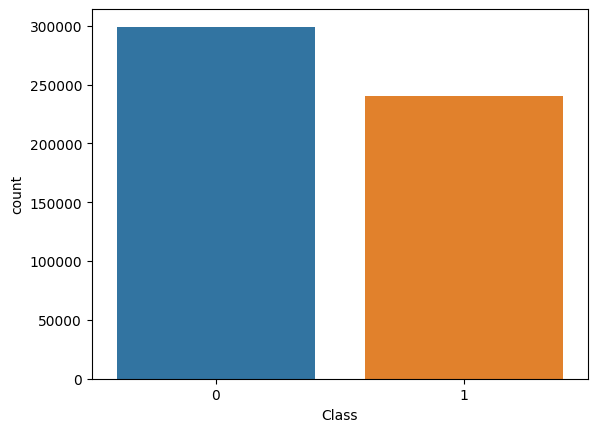

In [ ]:
sns.countplot(x='Class',data = flight_data)
flight_data['Class'].value_counts()

In [ ]:
from sklearn.utils import resample

# Dividing data into majority and minority
flight_major = flight_data[(flight_data['Class']==0)]
flight_minor = flight_data[(flight_data['Class']==1)]
# Umsampling minor data

flight_minor_upsample = resample(flight_minor,replace = True ,n_samples = len(flight_major),random_state = 0)

# combining both data

flight_upsampled = pd.concat([flight_minor_upsample, flight_major])

1    299118
0    299118
Name: Class, dtype: int64

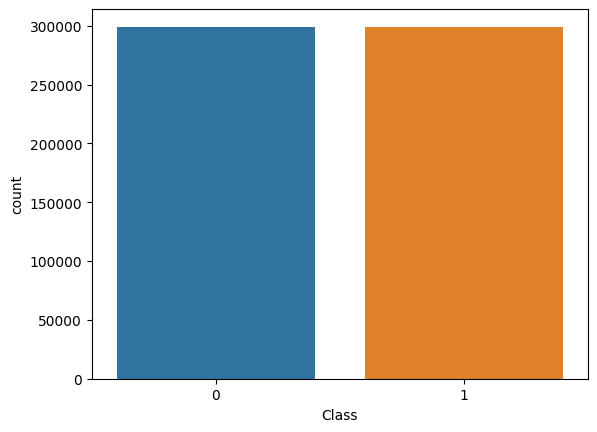

In [ ]:
sns.countplot(x='Class',data = flight_upsampled)
flight_upsampled['Class'].value_counts()

Removing Outliers from our data

In [ ]:
import scipy.stats as stats
z= np.abs(stats.zscore(flight_upsampled))
final_train = flight_upsampled[(z<3).all(axis=1)]
final_train.shape

(587262, 7)

Attribute Correlation

<Axes: >

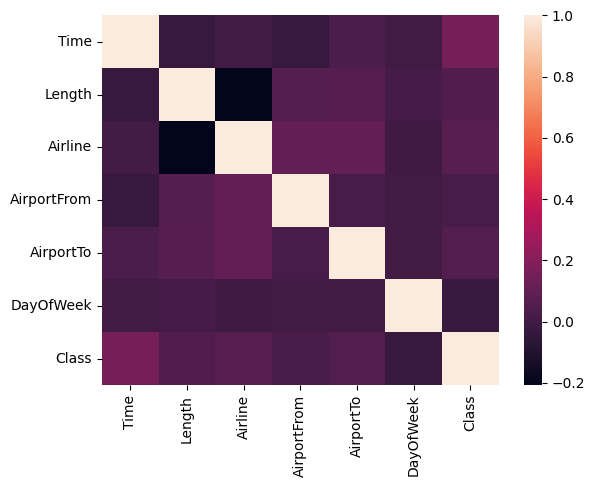

In [ ]:
sns.heatmap(final_train.corr(), fmt = '.2g')

In [ ]:
#dividing data into dependent and undependent feature 
x = final_train.drop('Class', axis=1)
y = final_train['Class']

Splitting data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

Implementation of various models

***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
log_pred =logistic_model.predict(x_test)
print("Accuracy Score : ",round(accuracy_score(y_test,log_pred)*100,2),'%')

Accuracy Score :  57.71 %


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("F-1 Score : ",round(f1_score(y_test,log_pred)*100,2),'%')
print("Precision Score : ",round(precision_score(y_test,log_pred)*100,2),'%')
print("Recall Score : ",round(recall_score(y_test,log_pred)*100,2),'%')

F-1 Score :  57.53 %
Precision Score :  57.55 %
Recall Score :  57.51 %


***DECISION TREE CLASSIFIER***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier= DecisionTreeClassifier()


dt_classifier.fit(x_train,y_train)


y_pred=dt_classifier.predict(x_test)
print("Accuracy Score : ", round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score :  68.23 %


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("F-1 Score : ",round(f1_score(y_test,y_pred)*100,2),'%')
print("Precision Score : ",round(precision_score(y_test,y_pred)*100,2),'%')
print("Recall Score : ",round(recall_score(y_test,y_pred)*100,2),'%')


F-1 Score :  67.62 %
Precision Score :  68.68 %
Recall Score :  66.58 %


***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(random_state=0)


rf_classifier.fit(x_train,y_train)


rf_predict=rf_classifier.predict(x_test)
print("Accuracy Score : ", round(accuracy_score(y_test,rf_predict)*100,2),'%')

Accuracy Score :  70.07 %


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("F-1 Score : ",round(f1_score(y_test,rf_predict)*100,2),'%')
print("Precision Score : ",round(precision_score(y_test,rf_predict)*100,2),'%')
print("Recall Score : ",round(recall_score(y_test,rf_predict)*100,2),'%')

F-1 Score :  70.89 %
Precision Score :  68.74 %
Recall Score :  73.18 %


***AdaBoost Classifier***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model= AdaBoostClassifier()
ada_model.fit(x_train,y_train)
ada_pred=ada_model.predict(x_test)
print("Accuracy Score : ", round(accuracy_score(y_test,ada_pred)*100,2),'%')

Accuracy Score :  62.79 %


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("F-1 Score : ",round(f1_score(y_test,ada_pred)*100,2),'%')
print("Precision Score : ",round(precision_score(y_test,ada_pred)*100,2),'%')
print("Recall Score : ",round(recall_score(y_test,ada_pred)*100,2),'%')

F-1 Score :  61.54 %
Precision Score :  63.42 %
Recall Score :  59.76 %


***Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Accuracy Score : ", round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score :  57.99 %


***KNN Classifer***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy Score : ", round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score :  67.66 %


***SVC Classifier***

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print("Accuracy Score : ", round(accuracy_score(y_test,y_pred)*100,2),'%')

In [ ]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score


model_1 = LogisticRegression()

model_1.fit(x_train, y_train)

ypred = model_1.predict(x_test)


model_2 = GaussianNB()

model_2.fit(x_train, y_train)

ypred = model_2.predict(x_test)


model_3 = RandomForestClassifier()

model_3.fit(x_train, y_train)

ypred = model_3.predict(x_test)


eclf = VotingClassifier(

 estimators=[('lr', model_1), ('rf', model_2), ('gnb', model_3)],

 voting='hard'

)


for clf, label in zip([model_1, model_2, model_3, eclf], ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Ensemble']):

 scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)

 print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))